# Model comparision


1.   Logistic regression with and without hypertuning
2.   Support vector machine with and without hypertuning
3.   random forest regressor
4.   Gradient Bossting





In [1]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-12-29 13:11:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.1s    

2024-12-29 13:11:34 (253 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ChurnData.csv")
print("Data information : \n",data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data['churn']
x = data.drop('churn',axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score,mean_absolute_error,classification_report,confusion_matrix,ConfusionMatrixDisplay
lg_model = LogisticRegression(C=0.01,solver="liblinear").fit(x_train,y_train)
y_preds = lg_model.predict(x_test)


Error in prediction :  0.2
Jaccard Score :  0.7241379310344828


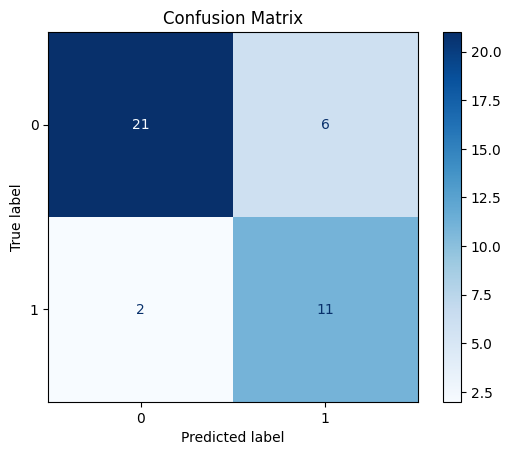

In [21]:
print("Error in prediction : ",mean_absolute_error(y_test,y_preds))
print("Jaccard Score : ",jaccard_score(y_test,y_preds,pos_label=0))
cm = confusion_matrix(y_test,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification using Support vector machine

In [54]:
from sklearn import svm

svm_model = svm.SVC(C=0.1,kernel="linear")
svm_model.fit(x_train,y_train)
y_preds = svm_model.predict(x_test)

Error in Prediction :  0.25
Jaccard score :  0.2857142857142857


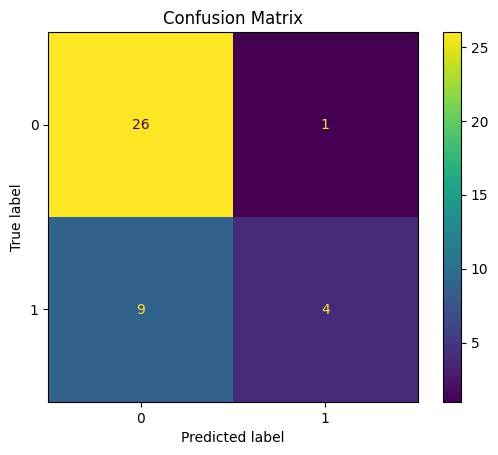

 Real Data 
 number of ones : 13 
 number of zeroes : 27


In [55]:
print("Error in Prediction : ",mean_absolute_error(y_test,y_preds))
print("Jaccard score : ",jaccard_score(y_test,y_preds,pos_label=1))

cm = confusion_matrix(y_test,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot()
plt.title("Confusion Matrix")
plt.show()
print(f" Real Data \n number of ones : {y_test[y_test==1.0].count()} \n number of zeroes : {y_test[y_test==0.0].count()}")

# Same using RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier(n_estimators=200,criterion="entropy",n_jobs=-1)
rfr_model.fit(x_train,y_train)
y_preds = rfr_model.predict(x_test)

Error in Prediction :  0.275
Jaccard score :  0.35294117647058826


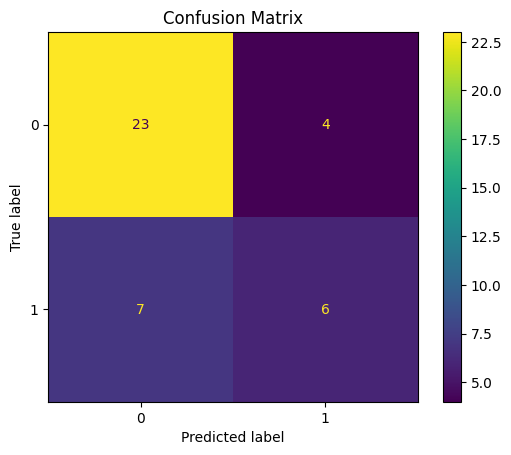

 Real Data 
 number of ones : 13 
 number of zeroes : 27


In [77]:
print("Error in Prediction : ",mean_absolute_error(y_test,y_preds))
print("Jaccard score : ",jaccard_score(y_test,y_preds,pos_label=1))

cm = confusion_matrix(y_test,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot()
plt.title("Confusion Matrix")
plt.show()
print(f" Real Data \n number of ones : {y_test[y_test==1.0].count()} \n number of zeroes : {y_test[y_test==0.0].count()}")

# Same using Gradient Bossting Classiication

In [82]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=800,learning_rate=0.01)
xgb_model.fit(x_train,y_train)
y_preds = xgb_model.predict(x_test)

Error in Prediction :  0.275
Jaccard score :  0.35294117647058826


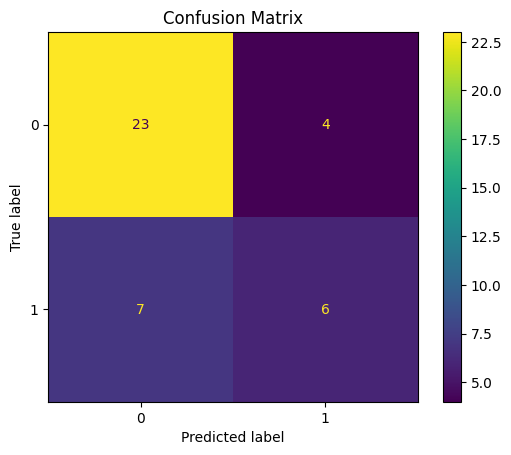

 Real Data 
 number of ones : 13 
 number of zeroes : 27


In [83]:
print("Error in Prediction : ",mean_absolute_error(y_test,y_preds))
print("Jaccard score : ",jaccard_score(y_test,y_preds,pos_label=1))

cm = confusion_matrix(y_test,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot()
plt.title("Confusion Matrix")
plt.show()
print(f" Real Data \n number of ones : {y_test[y_test==1.0].count()} \n number of zeroes : {y_test[y_test==0.0].count()}")

# using Hyperparameter

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'rbf', 'poly'],
    "gamma": ['scale', 'auto'],
    "degree": [2, 3, 4],
    "shrinking": [True, False],
    "tol": [1e-4, 1e-3],
    "class_weight": [None, 'balanced'],
    "probability": [True, False],
}

grid_model = GridSearchCV(estimator = svm_model,param_grid = param_grid,n_jobs=-1,cv = 3)
grid_model.fit(x_train,y_train)
y_preds = grid_model.predict(x_test)

Error in Prediction :  0.2
Jaccard score :  0.42857142857142855


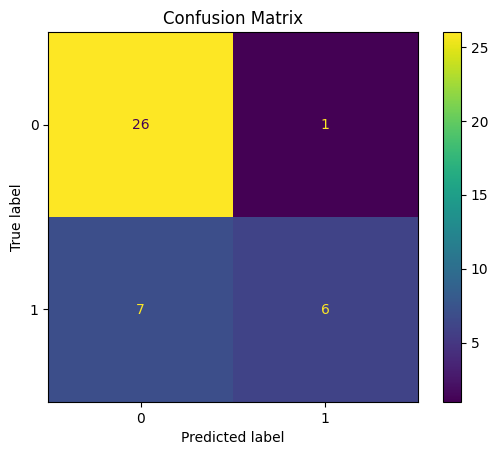

 Real Data 
 number of ones : 13 
 number of zeroes : 27
{'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True, 'tol': 0.0001}


In [95]:
print("Error in Prediction : ",mean_absolute_error(y_test,y_preds))
print("Jaccard score : ",jaccard_score(y_test,y_preds,pos_label=1))

cm = confusion_matrix(y_test,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot()
plt.title("Confusion Matrix")
plt.show()
print(f" Real Data \n number of ones : {y_test[y_test==1.0].count()} \n number of zeroes : {y_test[y_test==0.0].count()}")
print(grid_model.best_params_)